# NPxZxD chemostat model

For the first model example I will need:
- Forcing input
- Forcing_fluxes:
    - mixing
    - sinking
- 4 components (single) N, P, Z, D
- Fluxes:


In [ ]:
import numpy as np
import xsimlab as xs

In [ ]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra as phydra

In [ ]:
from phydra.utility.xsimlabwrappers import phydra_setup

In [ ]:
from phydra.processes.main import Grid0D, Boundary0D
from phydra.processes.components import Component, SizeComponent, Time, make_Component
from phydra.processes.environments import Chemostat
from phydra.processes.fluxes import (SizeAllo_LimitedGrowth_Monod, HollingTypeIII, SizeBasedKernelGrazing,
                                     make_flux, make_multigrazing)
from phydra.processes.forcingfluxes import (SizeAllo_LinearMortalityClosure, QuadraticMortalityClosure, N0_inflow, Outflow, make_FX_flux)
from phydra.processes.forcing import (ConstantN0, ConstantFlow)
from phydra.processes.gekkocontext import GekkoContext, GekkoSolve, InheritGekkoContext

In [5]:
from phydra.processes.forcing import NutrientForcing, MLDForcing

In [6]:
print('xarray-simlab version: ', xs.__version__)
print('phydra version: ', phydra.__version__)

xarray-simlab version:  0.4.1
phydra version:  0+untagged.82.g7e99bc8.dirty


In [7]:
model = xs.Model({
    'time':Time, 'grid':Grid0D, 'ibcs':Boundary0D, 
    
    'context':GekkoContext,
                  
    'N':make_Component('Nutrient','N', comp_type=Component), 
    'P':make_Component('Phytoplankton','P', comp_type=SizeComponent),
    'Z':make_Component('Zooplankton','Z', comp_type=SizeComponent), 
    
    'Env':Chemostat, 
    
    # Fluxes
    'P_Growth':make_flux(SizeAllo_LimitedGrowth_Monod, 'G'), 
     
    'LinMortality':make_FX_flux(SizeAllo_LinearMortalityClosure, 'L'),
    
    'Grazing':make_multigrazing(SizeBasedKernelGrazing, 'X'), 
    
    # Closure (i.e. output from system)
    'QuadMortality':make_FX_flux(QuadraticMortalityClosure, 'Z'),
    
    # ForcingFluxes
    'N0_influx':make_FX_flux(N0_inflow, 'W'),
    'Outflux':make_FX_flux(Outflow, 'O'),
    
    'N0':ConstantN0,
    'Flow':ConstantFlow,
    
    'solver':GekkoSolve
})

model

<xsimlab.Model (17 processes, 30 inputs)>
context
time
    days               [in] ('time',) time in days
grid
    length             [in]
    shape              [in]
ibcs
    ibc                [in] Initial Boundary Conditions
N
    dim                [in]
    init               [in]
P
    size_max           [in]
    size_min           [in]
    init               [in]
    dim                [in]
Z
    size_max           [in]
    size_min           [in]
    init               [in]
    dim                [in]
LinMortality
    mortality_rate     [in] mortality rate of component
    C_labels           [in] l label of component(s) that grows
N0
    value              [in] value of the constant forcing
Flow
    value              [in] value of the constant forcing
Outflux
    C_labels           [in] o label of component(s) that grows
P_Growth
    C_label            [in] label of component that grows
    R_label            [in] label of ressource component that is co...
QuadMortality
    mor

In [8]:
model.index_vars 


[('time', 'time'),
 ('N', 'N'),
 ('P', 'P'),
 ('Z', 'Z'),
 ('Env', 'components'),
 ('Env', 'fluxes'),
 ('Env', 'forcingfluxes'),
 ('Env', 'forcings'),
 ('P_Growth', 'G'),
 ('LinMortality', 'L'),
 ('Grazing', 'X'),
 ('QuadMortality', 'Z'),
 ('N0_influx', 'W'),
 ('Outflux', 'O')]

In [9]:
in_ds = phydra_setup(
    model=model,
    input_vars={
        'time__days': ('time', np.arange(0, 365, 0.1)), #365*
        
        'N':{'dim':1,'init':2}, 
        'P':{'dim':40,'init':0.1, 'size_min':1,'size_max':50},
        'Z':{'dim':40,'init':0.1, 'size_min':2.16,'size_max':460.5719},
        
        'P_Growth':{
               'R_label':'N',
               'C_label':'P'},
        
        'Grazing':{
               'R_label':'P',
               'C_label':'Z'},
        
                
        'LinMortality':{'mortality_rate':0.1,
               'C_labels':['P']},
        
        'QuadMortality':{'mortality_rate':0.1,
               'C_labels':['Z']},
        
        'N0_influx__C_labels':['N'],
        'Outflux__C_labels':['N','P','Z'],
        
        'Flow__value':.1,
        'N0__value':10,

    },
    output_vars={
        'Env__comp_output':None,
        'Env__flux_output':None,
        'Env__fxflux_output':None,
        'Env__forcing_output':None
    }
                 )

In [10]:
%%time
from time import process_time

with model:
    solve1_start = process_time()
    out_ds = in_ds.xsimlab.run()
    solve1_end = process_time()
    

print(f"Xsimlab Run done in {round(solve1_end-solve1_start,2)} seconds")

Initializing Gekko Context
Initializing Model Time
dimensions of component N are initialized at 1
Initializing component  N ['N']
dimensions of component P are initialized at 40
Initializing component  P ['P-0', 'P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6', 'P-7', 'P-8', 'P-9', 'P-10', 'P-11', 'P-12', 'P-13', 'P-14', 'P-15', 'P-16', 'P-17', 'P-18', 'P-19', 'P-20', 'P-21', 'P-22', 'P-23', 'P-24', 'P-25', 'P-26', 'P-27', 'P-28', 'P-29', 'P-30', 'P-31', 'P-32', 'P-33', 'P-34', 'P-35', 'P-36', 'P-37', 'P-38', 'P-39']
setup_dims (1, 40) P Size
[[ 1.          1.10551168  1.22215606  1.3511078   1.49366544  1.65126459
   1.82549228  2.01810303  2.23103646  2.46643685  2.72667474  3.01437076
   3.33242206  3.6840315   4.07273983  4.50246144  4.97752368  5.50271055
   6.08331075  6.72517106  7.43475512  8.21920859  9.08643106 10.04515562
  11.10503682 12.27674785 13.57208808 15.00410183 16.58720975 18.33735404
  20.27215898 22.41110843 24.77574202 27.38987206 30.27982334 33.47469823
  37.00666971 4

NameError: name 'TimeoutExpired' is not defined

In [11]:
out_ds

NameError: name 'out_ds' is not defined

In [ ]:
%%time
out_ds.Env__comp_output.plot.line(x='time')  #, ylim=0)#, ylim=(0,2.5))  # (0,2.5)
#out_ds.Env__comp_output.isel(components=slice(0,5)).sum(axis=0).plot.line(x='time')

In [ ]:
out_ds.Env__forcing_output.plot.line(x='time')

In [ ]:
out_ds.Env__forcing_output.sel(forcings='N0').plot(x='time')  #, time=np.arange(300,400)

In [ ]:
out_ds.Env__flux_output.plot.line(x='time')#, ylim=(0,.5))

In [ ]:
out_ds.Env__fxflux_output.plot.line(x='time')

In [48]:
with model:
    out1_ds = in_ds.xsimlab.update_vars(input_vars={'P':{'dim':1,'init':.5/1},
                                                   'Grazing':{'Imax':.5,
                                                   'halfsat':1.5,
                                                   'R_label':'P',
                                                   'C_label':'Z'}}).xsimlab.run()
    out2_ds = in_ds.xsimlab.update_vars(input_vars={'P':{'dim':2,'init':.5/2},
                                                   'Grazing':{'Imax':.5,
                                                   'halfsat':1.5/2,
                                                   'R_label':'P',
                                                   'C_label':'Z'}}).xsimlab.run()
    out5_ds = in_ds.xsimlab.update_vars(input_vars={'P':{'dim':5,'init':.5/5},
                                                   'Grazing':{'Imax':.5,
                                                   'halfsat':1.5/5,
                                                   'R_label':'P',
                                                   'C_label':'Z'}}).xsimlab.run()

Initializing Gekko Context
Initializing Model Time
dimensions of component N are initialized at 1
Initializing component  N ['N']
dimensions of component P are initialized at 1
Initializing component  P ['P']
dimensions of component Z are initialized at 1
Initializing component  Z ['Z']
ForcingBase is initialized: Flow
forcing flux Outflux is initialized at ['N' 'P' 'Z']
Initializing forcing flux Outflux for components ['N' 'P' 'Z']
flux P_Growth is initialized for N --> P
setup_dims (1, 1) P mu
[[0.7]]
setup_dims (1, 1) P halfsat_Growth
[[0.6]]
Initializing flux: P_Growth-N2P
forcing flux QuadMortality is initialized at ['Z']
Initializing forcing flux QuadMortality for components ['Z']
ForcingBase is initialized: N0
forcing flux LinMortality is initialized at ['P']
Initializing forcing flux LinMortality for components ['P']
forcing flux N0_influx is initialized at ['N']
Initializing forcing flux N0_influx for components ['N']
flux Grazing is initialized for P --> Z
setup_dims (1, 1) G

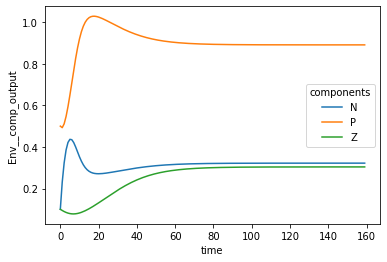

In [49]:
out1_ds.Env__comp_output.plot.line(x='time')

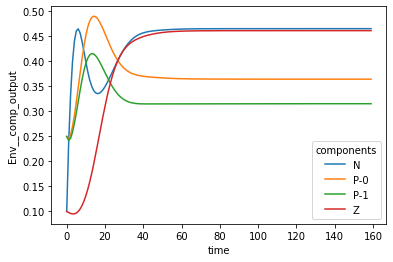

In [50]:
out2_ds.Env__comp_output.plot.line(x='time')

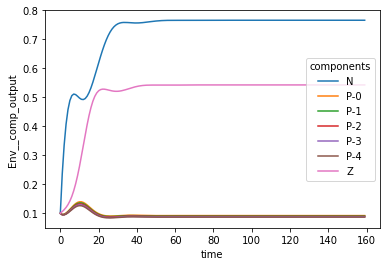

In [51]:
out5_ds.Env__comp_output.plot.line(x='time')